In [2]:
import pandas as pd
import seaborn as sns

In [3]:
metrics_path = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_11"

training_metrics = pd.read_csv(f"{metrics_path}/metrics.csv")

In [4]:
training_metrics

,epoch,multilabel_f1_macro,multilabel_f1_micro,multilabel_f1_weighted,step,train_loss,val_loss,val_multilabel_f1_macro,val_multilabel_f1_micro,val_multilabel_f1_weighted
0,0,NaN,NaN,NaN,49,0.172470,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,99,0.171250,NaN,NaN,NaN,NaN
2,0,NaN,NaN,NaN,149,0.186286,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,199,0.158403,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,249,0.162852,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
379,29,NaN,NaN,NaN,16099,0.002831,NaN,NaN,NaN,NaN
380,29,NaN,NaN,NaN,16149,0.004192,NaN,NaN,NaN,NaN
381,29,NaN,NaN,NaN,16199,0.005510,NaN,NaN,NaN,NaN
382,29,NaN,NaN,NaN,16229,NaN,0.472765,0.757493,0.840898,0.835834


<Axes: xlabel='epoch', ylabel='val_loss'>

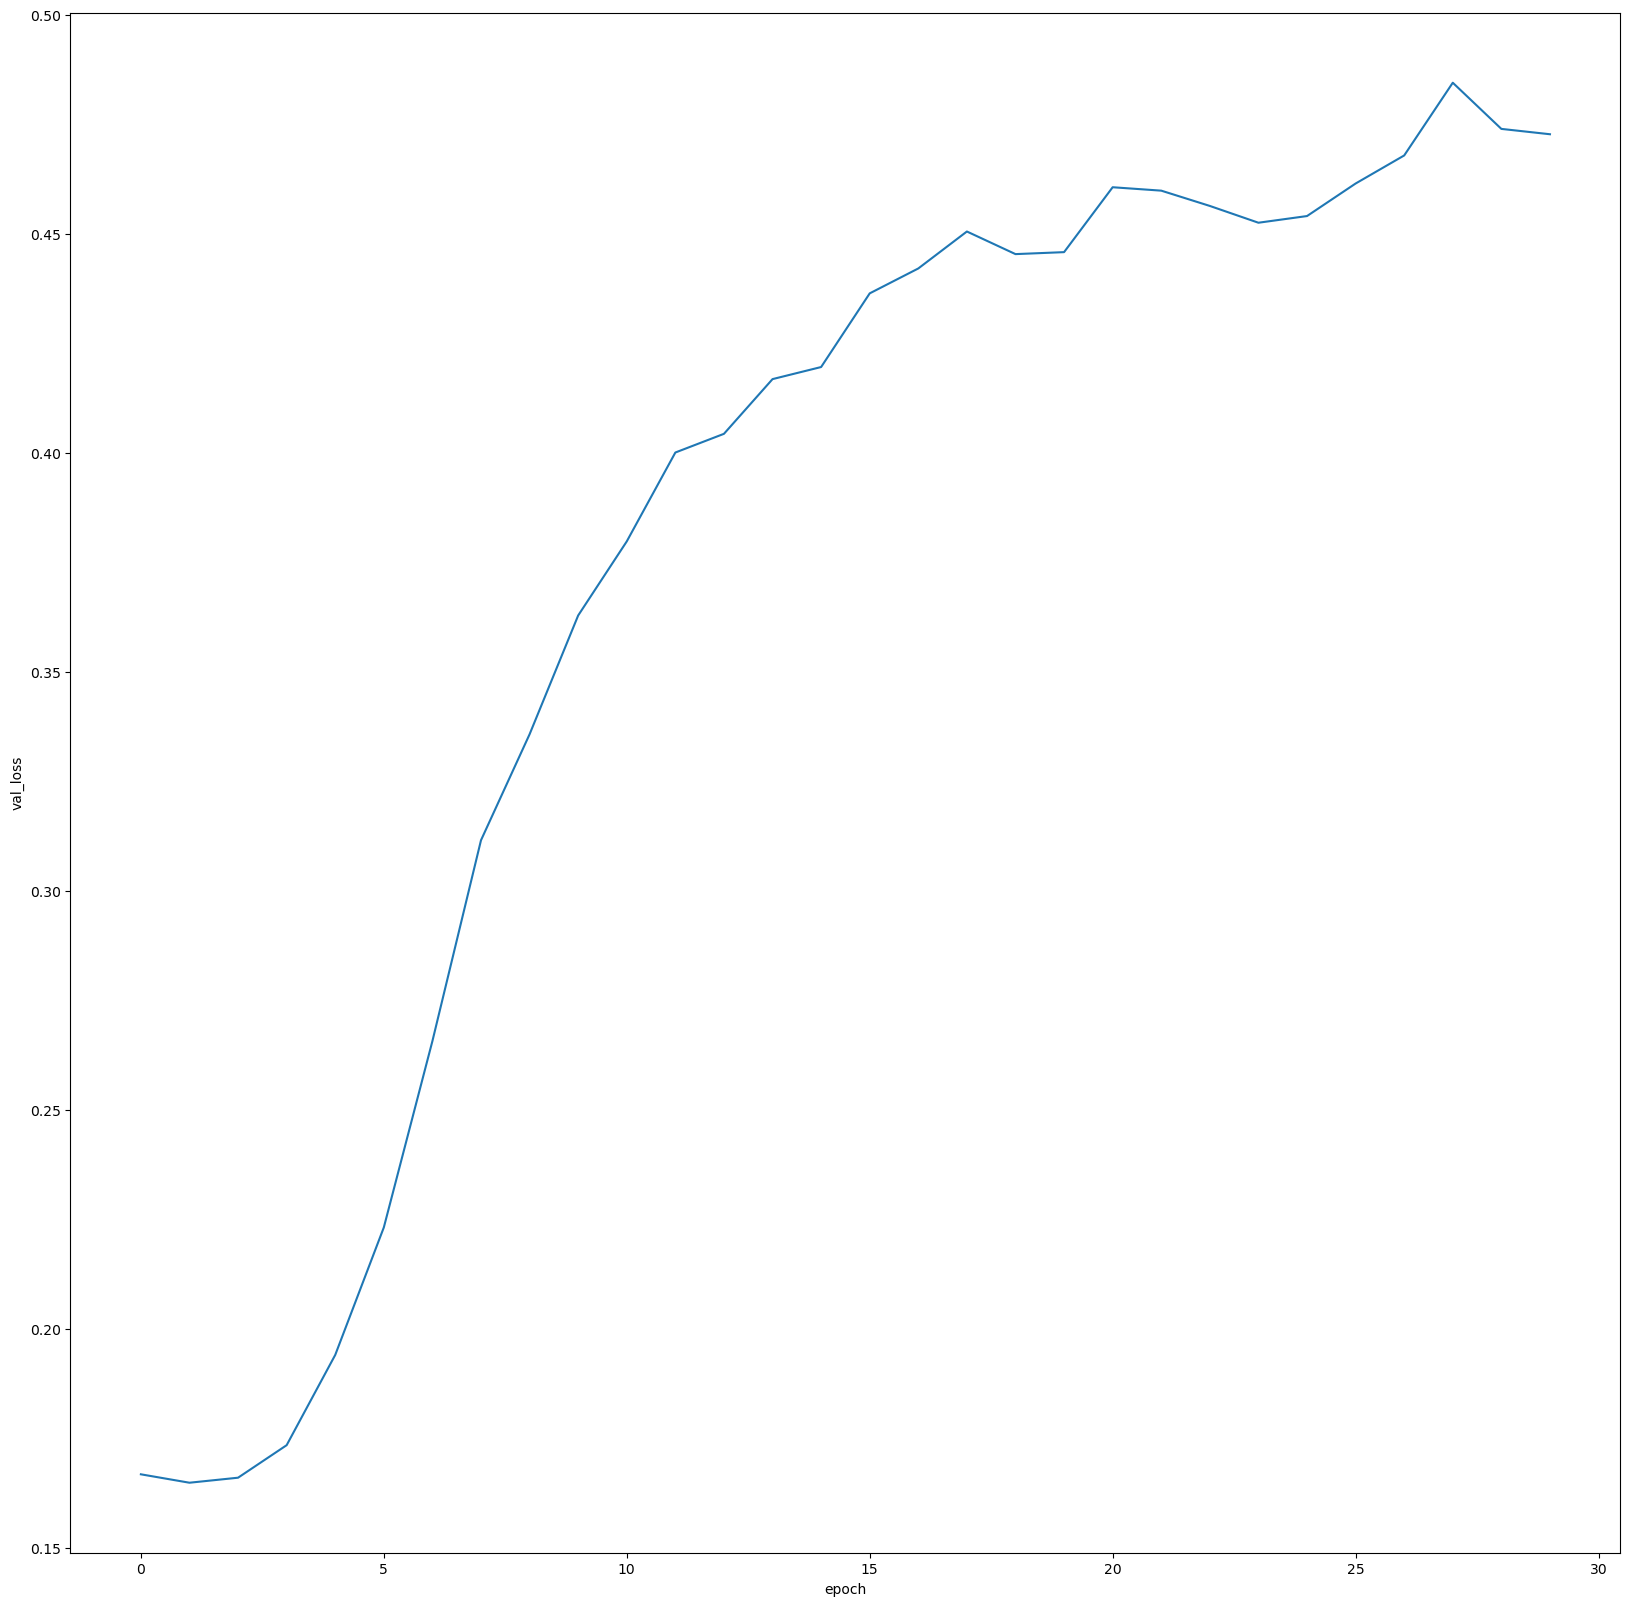

In [19]:
plt.figure(figsize = (20, 20))
sns.lineplot(data = training_metrics, x = "epoch", y = "val_loss")

<Axes: >

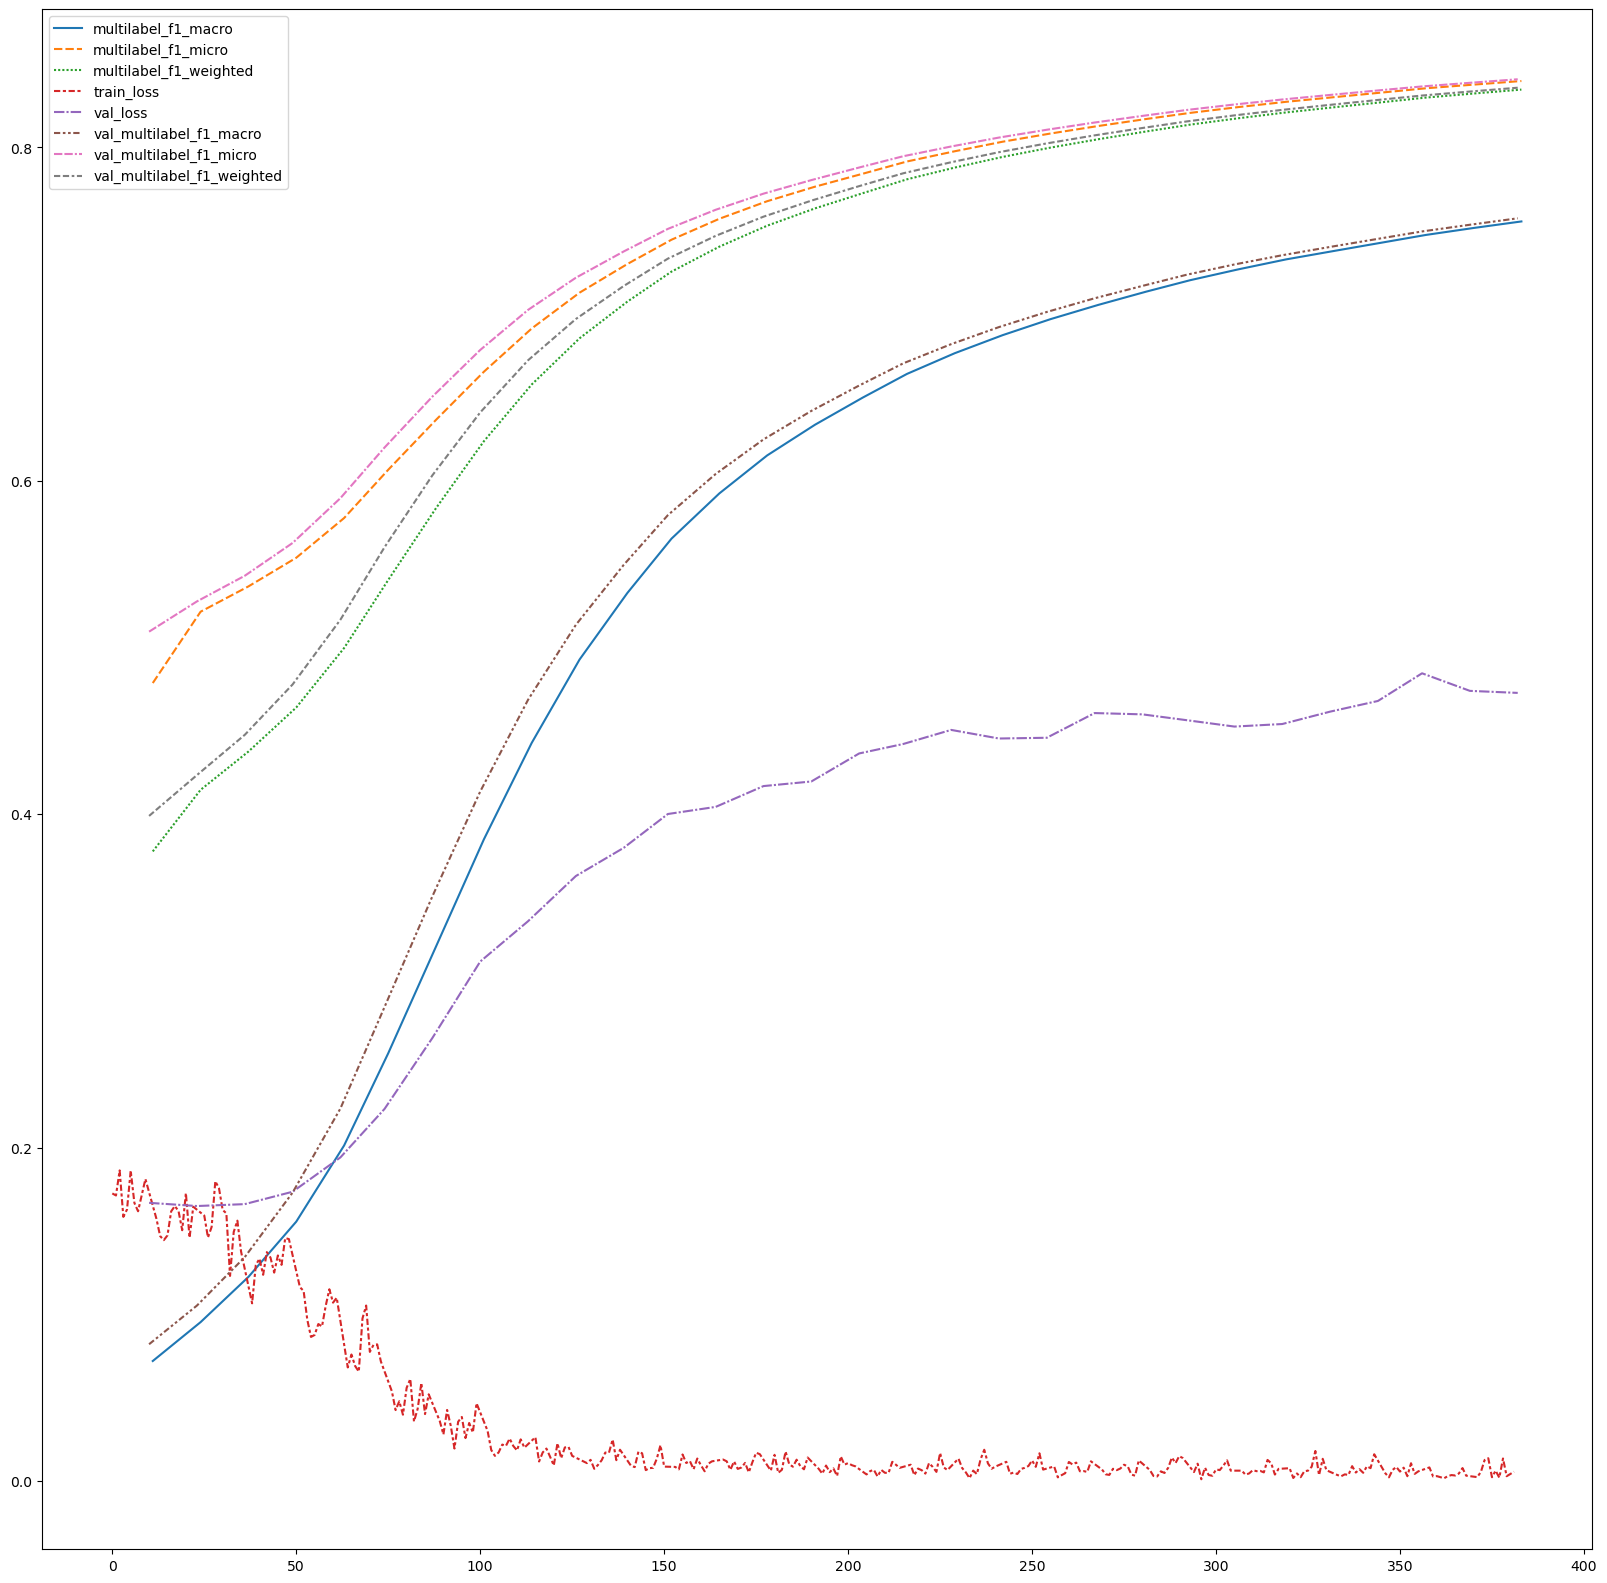

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
sns.lineplot(data = training_metrics.drop(columns = ['step', 'epoch']))